In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
import glob
import re

sns.set_theme(style="whitegrid")

,Spheres,Resolution,Time
0,1,400x400,0.040967
1,1,400x400,0.042850
2,1,400x400,0.039844
3,1,400x400,0.040956
4,1,400x400,0.040220
...,...,...,...
445,9,400x400,0.677014
446,9,400x400,0.687907
447,9,400x400,0.681578
448,9,400x400,0.732931


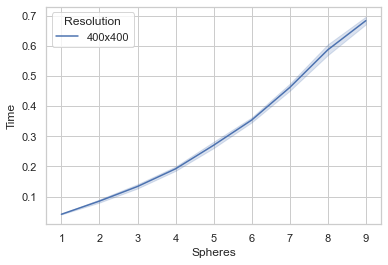

In [4]:
joined_files = os.path.join("CPU_*_400x400.csv")
joined_list = glob.glob(joined_files)
# tips2 = pd.read_csv('test1.csv')
tips2 = pd.concat(map(pd.read_csv, joined_list), ignore_index=True)
tips2.to_csv("CPU_400x400")
# tips2["Time"] = tips2["Time"].astype("double")
display(tips2)



ax = sns.lineplot(x="Spheres", y="Time", hue="Resolution", data=tips2)
# ax.set_yscale("log") # use log    

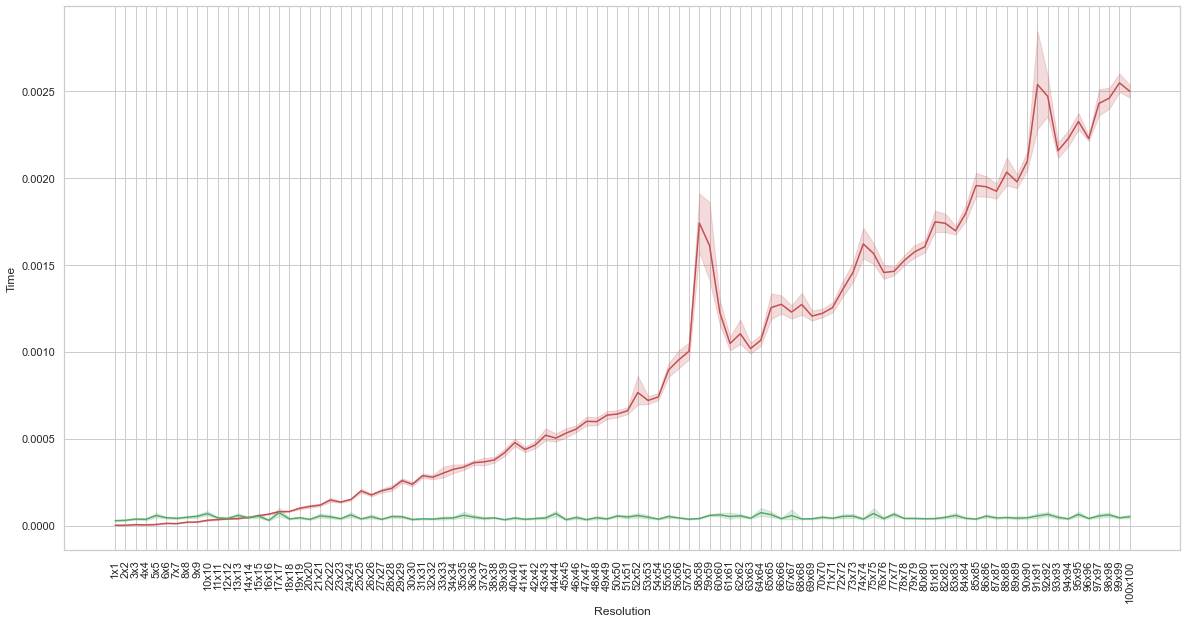

In [23]:
joined_files = os.path.join("CPU/1-100/*.csv")
joined_files2 = os.path.join("GPU/1-100/*.csv")
joined_list = sorted(glob.glob(joined_files))
joined_list2 = glob.glob(joined_files2)
# display(joined_list)
# tips2 = pd.read_csv('test1.csv')
test = pd.concat(map(pd.read_csv, joined_list), ignore_index=True)
test2 = pd.concat(map(pd.read_csv, joined_list2), ignore_index=True)


# tips2 = pd.read_csv("GPU_1-100.csv")
# tips3 = pd.read_csv("CPU_1-100.csv")
# tips4 = pd.read_csv("GPU-1-1200.csv")
search = []    
for values in test['Resolution']:
    search.append(re.search(r'(\d+)x', values).group(1))
test['Width'] = search
test['Width'] = test['Width'].astype('int')
test = test.sort_values(["Width"], ascending=[True])
# display(test)
# tips2["Time"] = tips2["Time"].astype("double")
# display(tips2)
search2 = []    
for values in test2['Resolution']:
    search2.append(re.search(r'(\d+)x', values).group(1))
test2['Width'] = search2
test2['Width'] = test2['Width'].astype('int')
test2 = test2.sort_values(["Width"], ascending=[True])


plt.figure(figsize=(20,10))
ax = sns.lineplot(x="Resolution", y="Time", data=test, color='r')
ax = sns.lineplot(x="Resolution", y="Time", data=test2, color='g')
# ax.set_yscale("log") # use log
# plt.show()    
plt.xticks(rotation=90);